In [109]:
#assignment3
import numpy as np
import csv
import pandas as pd

In [93]:
#assignment3.2
data = np.genfromtxt('ccp.csv', delimiter=',', dtype=np.uint, skip_header=1) 
print(data)

[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [1992   99   89 5100    1]
 [1992   99   90 5180    1]
 [1992   99   93 5100    1]]


In [147]:
#assignment3.3 it's assumed only england and USA is english speaking countries
english_stat_code = [5390, 5170]

#1D array of indices where req occurs on third column in 2D array
USA_citizens_occurence = np.where(data[:,3] == english_stat_code[0])
ENG_citizens_occurence = np.where(data[:,3] == english_stat_code[1])

#fancy indexing
USA_citizens = data[USA_citizens_occurence]
ENG_citizens = data[ENG_citizens_occurence]

english_speaking = sum(USA_citizens[:,4]) + sum(ENG_citizens[:,4]) 
non_english_speaking = sum(data[:,4]) - english_speaking
print("english speaking: " + str(int(english_speaking)))
print("non english speaking: " + str(int(non_english_speaking)))

english speaking: 131009
non english speaking: 12038387


In [149]:
#assignment3.4.1
def another_function_dataset(dataset, mask):
    data_indices = np.where(mask)
    return dataset[data_indices]
print(another_function_dataset(data, data[:,3] == 5390))

[[2015    1    0 5390    1]
 [2015    1    1 5390    3]
 [2015    1    2 5390    5]
 ...
 [1992   99   43 5390    1]
 [1992   99   44 5390    1]
 [1992   99   70 5390    1]]


In [102]:
#assigment3.4.2 
def another_function(dataset, mask):
    data_indices = np.where(mask)
    res = dataset[data_indices]
    return sum(res[:,4])
print(another_function(data, data[:,3] == 5390))

41992.0


In [107]:
#assignment3.5 - more lulz what are you gonna do if year and persons has the same number? DOUBLE ROW BABY
def another_function2(dataset, shitty_argument):
    mask = np.where(data == shitty_argument)
    cur_indices = dataset[mask[0]]
    return sum(cur_indices[:,4])
another_function2(data, 5390)

41992.0

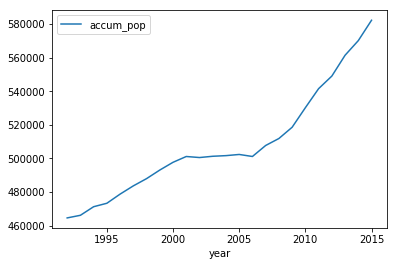

In [157]:
#assignment3.6
#get unique years
unique_years = np.unique(data[:,0])
accums = {}
for uy in unique_years:
    accums[uy] = another_function2(data, uy)
#represent as list and specify columns
plot1 = pd.DataFrame(list(accums.items()), columns=["year", "accum_pop"])
plot1.plot(x="year",y="accum_pop")

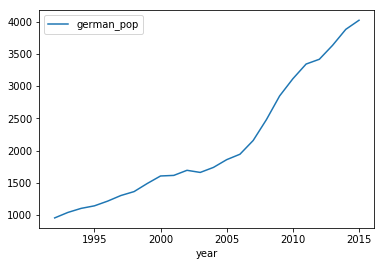

In [165]:
#assignment3.7
german_dataset = another_function_dataset(data, data[:,3] == 5180)
accums_german = {}


for uy2 in unique_years:
    mask = np.where(german_dataset == uy2)
    cur_data_line = german_dataset[mask[0]]
    accums_german[uy2] = sum(cur_data_line[:,4])
#print(accums_german)
plot2 = pd.DataFrame(list(accums_german.items()), columns=["year", "german_pop"])
#print(plot2)
plot2.plot(x="year", y="german_pop")

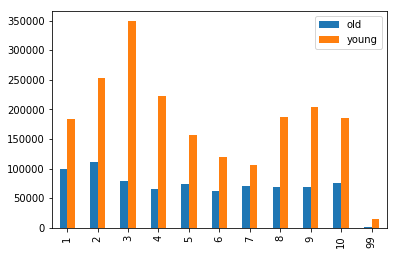

In [214]:
#assignment3.8
#finds 18-25
young_people = np.where(np.logical_and(data[:,2]>=18, data[:,2]<=25))
old_people = np.where(np.logical_and(data[:,2]>=60, data[:,2]<=67))
yp_dataset = data[young_people]; op_dataset = data[old_people]
unique_city_parts = np.unique(data[:,1])

calc_young = []
calc_old = []
for up in unique_city_parts:
    mask_young = np.where(yp_dataset == up)
    cur_line_young = yp_dataset[mask_young[0]]
    calc_young.append(sum(cur_line_young[:,4]))
    
    mask_old = np.where(op_dataset == up)
    cur_line_old = op_dataset[mask_old[0]]
    calc_old.append(sum(cur_line_old[:,4]))


#plotting
plot3 = pd.DataFrame({'old':calc_old, 'young':calc_young}, index=unique_city_parts)
plot3.plot.bar()

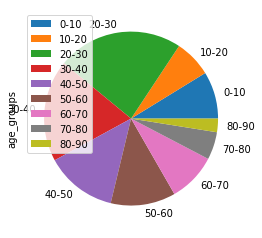

In [255]:
#assignment 3.9 assumed østerbro is 1 and vesterbro is 2 - PLEASE FUCKING SEND LINKS FOR SPECIFCATION ON DATASETS IN THE ASSIGNMENT
oster_bro_indices = np.where(data[:,1] == 1)
oster_bro_dataset = data[oster_bro_indices]
labels = [ [0, 10], [10,20], [20,30], [30,40],[40,50],[50,60], [60,70], [70,80], [80, 90] ]
index = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70","70-80", "80-90"]
sum_pr_age_group = []
#find age values
for x in labels:
    cur_indices = np.where(np.logical_and(oster_bro_dataset[:,2]>=x[0], oster_bro_dataset[:,2]<=x[1]))
    cur_age_range = oster_bro_dataset[cur_indices]
    sum_pr_age_group.append(sum(cur_age_range[:,4]))

#writeout pie chart
#labels_test = [5, 10, 20, 30, 40]
df = pd.DataFrame({'age_groups': sum_pr_age_group}, index=index)
plot = df.plot.pie(y='age_groups')
#vesterbro is the same just cahnge data[:,1] == 2 or w/e is index for vesterbro